# Project 3
Team members: Paul, Renata and Hero

In this notebook we are training models to predict whether a food place will pass or fail an inspection. 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
#number of unique establishments

len(chicago_inspections_2011_to_2013['DBA_Name'].unique())

9369

In [5]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True) 
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')

In [8]:
chicago_inspections_2011_to_2013.head()

,,Inspection_Date,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Inspection_MonthYear
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,2013-01-31,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.0,1,44-33,19.0,Retail Food Establishment,RENEW,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,2013-01
507211,PANERA BREAD,2011-10-18,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.0,1,50-23,24.0,Retail Food Establishment,RENEW,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,2011-10
507212,LITTLE QUIAPO RESTAURANT,2011-10-18,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,50-25,17.0,Retail Food Establishment,RENEW,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,2011-10
507216,SERGIO'S TAQUERIA PIZZA INC.,2011-10-19,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.0,1,39-48,17.0,Retail Food Establishment,RENEW,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,2011-10
507219,TARGET STORE # T-2079,2011-10-20,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,40-18,24.0,Retail Food Establishment,RENEW,2006-07-07,2018-02-15,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,2011-10


## Visualization

What do inspections look like over time?

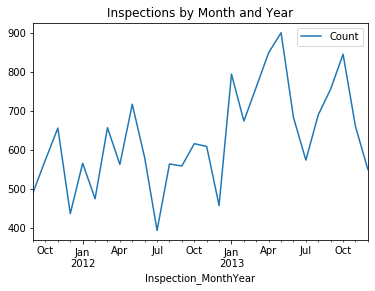

In [18]:
# Visualize Inspections Over Time
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

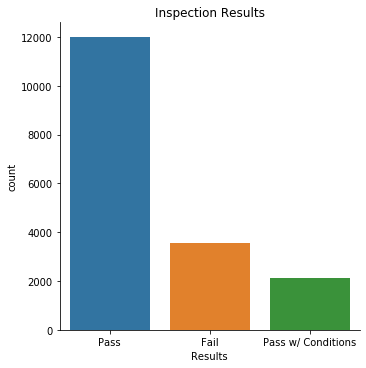

In [19]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

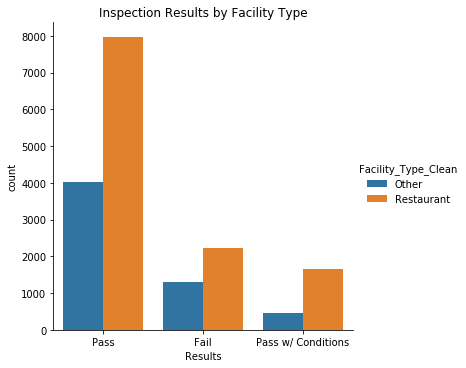

In [20]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [9]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [10]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [11]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


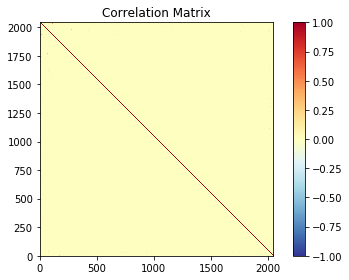

In [12]:
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

corr_matrix = np.corrcoef(X.T)
smg.plot_corr(corr_matrix)
plt.show()

# looks like there might be a few dots of high correlations...
# Hero: how should I read this plot?

In [13]:
# finding very highly correlated vars

for i in range(len(corr_matrix)):
    for j in range(i):
        if abs(corr_matrix[i,j]) > 0.9:
            print(X.columns[i], "and", X.columns[j])
            print(corr_matrix[i,j])
        

firstRecord and timeSinceLast
0.9042314533095992
Facility_Type_Clean_Other and Facility_Type_Restaurant
-1.0
Facility_Type_Clean_Restaurant and Facility_Type_Restaurant
1.0
Facility_Type_Clean_Restaurant and Facility_Type_Clean_Other
-1.0
WARD_PRECINCT_19-39 and Facility_Type_Private School
1.0
WARD_PRECINCT_29-36 and Facility_Type_CATERING/CAFE
1.0
WARD_PRECINCT_8-65 and Facility_Type_Shared Kitchen User (Long Term)
0.9999999999999998
LICENSE_DESCRIPTION_Food - Shared Kitchen and Facility_Type_Shared Kitchen
1.0
LICENSE_DESCRIPTION_Mobile Food License and Facility_Type_Mobile Food Preparer
0.9999999999999998
LICENSE_DESCRIPTION_Shared Kitchen User and Facility_Type_Shared Kitchen User (Long Term)
0.9999999999999998
LICENSE_DESCRIPTION_Shared Kitchen User and WARD_PRECINCT_8-65
0.9999999999999998
LICENSE_DESCRIPTION_Special Event Food and WARD_PRECINCT_43-25
1.0
APPLICATION_TYPE_RENEW and APPLICATION_TYPE_ISSUE
-0.9838471057796992


Seems like we can safely drop: timeSinceLast, Facility_Type_Clean_Other, Facility_Type_Restaurant, WARD_PRECINCT_19-39, WARD_PRECINCT_29-36, WARD_PRECINCT_8-65, LICENSE_DESCRIPTION_Food - Shared Kitchen, LICENSE_DESCRIPTION_Mobile Food License, LICENSE_DESCRIPTION_Shared Kitchen User, WARD_PRECINCT_43-25, APPLICATION_TYPE_RENEW

In [14]:
X = X.drop(columns = ['timeSinceLast', 'Facility_Type_Clean_Other', 'Facility_Type_Restaurant', 
                      'WARD_PRECINCT_19-39', 'WARD_PRECINCT_29-36', 'WARD_PRECINCT_8-65', 
                      'LICENSE_DESCRIPTION_Food - Shared Kitchen', 'LICENSE_DESCRIPTION_Mobile Food License', 
                      'LICENSE_DESCRIPTION_Shared Kitchen User', 
                     'WARD_PRECINCT_43-25', 'APPLICATION_TYPE_RENEW'])

## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

First, we initialize some lists to record our tuned hyperparameters and validation metrics for each model we run.

In [15]:
models = ['random forest', 'decision tree','lda', 'log']
parameters = []
trained_models = []
accuracy = []
recall = []
precision = []
f1_score = []

For our models below, when we tune our hyperparameters, we select the best hyperparameters based on mean test prediction. The precision of a model tells us of all the establishments we label as positive (predicted to fail the inspection), what fraction of them are actually positive (actually failed the inspection). We think this is a valuable metric for this setting because we have limited resources to recommend 1000 establishments for audit and we want the true positive rate to be high for our model. In this setting, recall is less important as we are not concerned with being exhaustive in our classification (ie. capturing every failed establishment) but instead concerned with being precise (ie. correcntly capturing the riskiest businesses).  

### Standardize Data
Before training the models, we standardize all our predictors. 

In [25]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

# normalizing features 
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns, index=X.index) 


In [26]:
#X.head()

### Model 1 - Random Forest and Decision Tree Classifier
A decision tree makes predictions based on a series of if-then conditions. A pro of decision trees is that they are highly flexible and allow for non-linear modelling. A con of decision trees is that they suffer from overfit, in which they can preduce low bias results for the training data but high variance results in the test data. To reduce the variance (at the cost of increased bias), we can impliment pruning techniques, such as controlling the maximum depth of the tree or setting a threshold for the Gini index below which we no longer split the data. We can also use ensemble methods, such as random forests, to reduce variance across multiple sets of data. 

In the context of this problem, a not-too complex decision tree (ie. one that has been pruned), could provide good insight into the types of predictors that are important for whether or not an establisment passes an inspection. This is useful for a policy context where policy makers not only want to know *which* establishments should be failed, but also *why* they are being failed. 

As a trade off between complexity and interprability, we start by training a random forest using five crossfold validation. Once the hyperparameters are tuned, the best model is fit on all the data and we plot the top 10 predictors that are most important. We then train a decision tree on the most important predictors and use the relevant hyperparameters from the random forest. The resulting decision tree gives an interpratable model for policy makers while benefitting from the **FILL IN** of a random forest. 

Upsampling the minority class in this model estimation using the imblearn package, in a method called Synthetic Minority Oversampling Technique (SMOTE). Info from https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

#### Random Forest

In [27]:
#upsampling using SMOTE

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              RandomForestClassifier())

# grid of potnetial hyperparameters
param_grid = {'randomforestclassifier__criterion': ['gini', 'entropy'],
             'randomforestclassifier__max_depth': [1, 5, 10],
             'randomforestclassifier__min_impurity_decrease': [0.0001, 0.0005, 0.001],
             'randomforestclassifier__random_state': [10]}

rf_grid = GridSearchCV(imba_pipeline, param_grid, cv = 5, 
                       scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                       refit = 'precision', verbose = 10)

In [ ]:
# fit on entire data 
rf_grid.fit(X, y.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [ ]:
# WARNING: using accuracy to select best model, could use other metric
# report best parameters and metrics from the grid search
best_index = np.argmax(rf_grid.cv_results_['mean_test_accuracy'])

metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", rf_grid.cv_results_[i][rf_grid.best_index_])

In [ ]:
# record paramaters and metrics
parameters.append(rf_grid.cv_results_['params'][best_index])
trained_models.append(rf_grid.best_estimator_)
accuracy.append(rf_grid.cv_results_["mean_test_accuracy"][best_index])
precision.append(rf_grid.cv_results_["mean_test_precision"][best_index])
recall.append(rf_grid.cv_results_["mean_test_recall"][best_index])
f1_score.append(rf_grid.cv_results_["mean_test_f1"][best_index])

The plot below shows which features are actually important in our model. 

In [ ]:
# Refit the random forest on the whole dataset to get feature importances
# WARNING: best parameters are hardcoded - find a way to change this
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              RandomForestClassifier(criterion = 'gini', max_depth = 10, 
                                                     min_impurity_decrease = 0.0001, random_state = 10))

imba_pipeline.fit(X, y.ravel())
import seaborn as sns

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(imba_pipeline.steps[1][1].feature_importances_)]
                             , axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

The plot above shows that the most important predictors are the number of violations recorded for an establishment. The number of **serious** violations is the most important determinant for whether or not a establishment passes the inspection. This makes intuitive sense, as you can imagine inspectors summing up the number of violations and putting more weight on them if they are serious (we assume that serious is more of a violation than critical or minor). Given that only a subset of features are important, we retrain a simplified decision tree by using the subset of important features and placing additional limits on the complexity of the tree. This gives us a far more interpretable model, which we can even plot to see the decision paths for failing or passing establishments. 

In [ ]:
# save rf model
rf_tuned_pipe = imba_pipeline
rf_tuned_pipe

#### Decision Tree
In order to decide how many of the most important features to include in our decision tree, we tune a decision tree using a range of most important features and report the precision of each of the models.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              DecisionTreeClassifier())

param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
             'decisiontreeclassifier__max_depth': [1, 5, 10],
             'decisiontreeclassifier__min_impurity_decrease': [0.0001, 0.0005, 0.001],
             'decisiontreeclassifier__random_state': [10]}

dt_grid = GridSearchCV(imba_pipeline, param_grid, cv = 5, 
                       scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                       refit = 'precision', verbose = 10)

In [ ]:
# loop over number of different features and save precision
precision = []
#accuracy = []
param_n = []

for n in [1, 5, 10, 50, 100, 200, 300, 400]:

    # create reduced data frame 
    important_features = feat_importances.nlargest(n, 'Importance')['Feature']
    # change this depending on how many predictors want to include

    X_reduced = X[X.columns[X.columns.isin(important_features)]]
    
    # fit on reduced data
    dt_grid.fit(X_reduced, y.ravel())
    
    # best fit for given n
    best_index = np.argmax(dt_grid.cv_results_['mean_test_precision'])
    
    # record the precision  
    precision.append(dt_grid.cv_results_["mean_test_precision"][best_index])
    
    # record the number of parameters
    param_n.append(n)

In [ ]:
# plot n vs precision
plt.scatter(param_n, 
            precision)
plt.xlabel('Number of Parameters')
plt.ylabel('Mean Test Precision')
plt.show()

The plot above shows a variable relationship between number of predictors and mean test precision. Initially, increasing the number of important predictors increases the precision. This falls and rises again for 300 and 400 predictors respectively. Ideally, we would do a more fine grained search but this is costly time wise to run. As our aim is to produce a less complex model, we settle on the top 100 most important predictors to include in the decision tree, trained below.  

In [ ]:
# create reduced data frame 
important_features = feat_importances.nlargest(100, 'Importance')['Feature']
# change this depending on how many predictors want to include

X_reduced = X[X.columns[X.columns.isin(important_features)]]

# fit on reduced data
dt_grid.fit(X_reduced, y.ravel())

# report best metrics
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", dt_grid.cv_results_[i][dt_grid.best_index_])


In [ ]:
# record paramaters and metrics
parameters.append(dt_grid.cv_results_['params'][best_index])
trained_models.append(dt_grid.best_estimator_)
accuracy.append(dt_grid.cv_results_["mean_test_accuracy"][best_index])
precision.append(dt_grid.cv_results_["mean_test_precision"][best_index])
recall.append(dt_grid.cv_results_["mean_test_recall"][best_index])
f1_score.append(dt_grid.cv_results_["mean_test_f1"][best_index])

We plot the first 5 levels of the decision tree below to see on what predictors the splits are made. The first split is made on serious count, which is in line with the importance of this predictor shown above. 

In [ ]:
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(dt_grid.best_estimator_[1], #steps[1][1], 
                   feature_names=X_reduced.columns,  
                   class_names=["Pass", "Fail"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 5)

In [ ]:
# refit the saved model with the tuned parameters
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              DecisionTreeClassifier(criterion = 'gini', max_depth = 10, 
                                                     min_impurity_decrease = 0.0001, random_state = 10))

imba_pipeline.fit(X_reduced, y.ravel())

In [ ]:
dt_tuned_pipe = imba_pipeline

## Model 2

## LDA

Linear Discriminant Analysis, or LDA, is a way of approximating the distribution of the classes of Y using Bayes' Theorem. The LDA classifier estimates the prior probability of an observation belonging to the kth class using the proportion of the training observations. The LDA classifier also assumes that feature values are drawn from a multivariate Gaussian distribution (with class-specific means) and that all classes share a common covariance matrix. Using these estimates of the prior probability and covariance matrix, LDA uses Bayes' Rule to estimate the posterior probability of observation X<sub>i</sub> belonging to each class, assigning observation i to the class k with the highest posterior probability. 

One potential benefit of LDA, especially when the classes of Y are well separated, is that it estimates the Bayes decision boundary instead of modeling the conditional distribution of Y given X (as in logistic regression). This is also beneficial when the number of observations is relatively small. A drawback of estimating using Bayes' rule is that the LDA classifier attempts to minimize total error, regardless of whether it is type 1 or type 2. Because this dataset is class imbalanced, there is a risk that the LDA classifier will be much better at predicting the majority class (those establishments who pass) than what we are interested in, which is the minority class (those who fail). In this model, we play around with upsampling to see if having equal estimated prior probabilities in the training set (because of balanced classes) will allow the LDA classifier to perform better predictions. 

Lastly, LDA estimates a decision boundary through a linear combination of the features. In that sense, the weights of this linear combination are not easily interpretable in terms of directionality (e.g., it would not be clear how an increase or decrease in some feature influences the prediction). However, we can reasonably argue that those features whose weights are relatively large in absolute value are important to the analysis. 



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

In [ ]:
lda_model = clf.fit(X, y.ravel())

In [ ]:
#first round, tuning solver and shrinkage (class imbalanced)

from sklearn.model_selection import GridSearchCV

lda_reg = LinearDiscriminantAnalysis()

param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
               'shrinkage': ['auto', None]}

lda_grid_reg = GridSearchCV(lda_reg, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
lda_grid_reg.fit(X, y.ravel())

In [ ]:
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", lda_grid_reg.cv_results_[i][lda_grid_reg.best_index_])
    

# precision seems decent! but recall is pretty low
# doesn't seem like the shrinkage parameter is useful, so will not tune it further
      

In [ ]:
from sklearn.model_selection import cross_validate

#generating tuned scores for non-upsampled dataset (class imbalanced)

lda_scores = cross_validate(lda_grid_reg.best_estimator_, X, y.ravel(),
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                         cv=5, n_jobs = -1)

In [ ]:
for x in lda_scores.keys(): 
    print("Average", x, "is", lda_scores[x].mean())

# not sure why, but precision is MUCH lower than what was estimated in the grid search

In [ ]:
#upsampling using SMOTE
# from https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LinearDiscriminantAnalysis())



In [ ]:
#first round, tuning solver and shrinkage

from sklearn.model_selection import GridSearchCV

#lda_reg = LinearDiscriminantAnalysis()

param_grid = {'lineardiscriminantanalysis__solver': ['svd', 'lsqr', 'eigen'],
               'lineardiscriminantanalysis__shrinkage': ['auto', None]}

lda_grid_reg = GridSearchCV(imba_pipeline, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
lda_grid_reg.fit(X, y.ravel())

In [ ]:
metrics = ["params", "mean_test_accuracy", "mean_test_precision", 
           "mean_test_recall", "mean_test_f1", "mean_fit_time"]

for i in metrics:
    print(i, ":", lda_grid_reg.cv_results_[i][lda_grid_reg.best_index_])
      


In [ ]:
# second round, tuning shrinkage parameter

from sklearn.model_selection import GridSearchCV

# adding the shrinkage 

param_grid= {'lineardiscriminantanalysis__shrinkage' : np.arange(0.8, 1.0, 0.01)}



lda_grid_reg2 = GridSearchCV(lda_grid_reg.best_estimator_, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 

lda_grid_reg2.fit(X, y.ravel())

In [ ]:
for i in metrics:
    print(i, ":", lda_grid_reg2.cv_results_[i][lda_grid_reg2.best_index_])
    

plt.scatter(lda_grid_reg2.cv_results_['param_lineardiscriminantanalysis__shrinkage'], 
            lda_grid_reg2.cv_results_["mean_test_precision"])
plt.xlabel('gamma')
plt.ylabel('mean precision')
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

lda_up_scores = cross_validate(lda_grid_reg2.best_estimator_, X, y, scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1)

In [ ]:
print("Upsampled")
for i in lda_up_scores:
    print("Average", i, "is", lda_tuned_scores[i].mean())

In [ ]:
print("Imbalanced")
for x in lda_scores.keys(): 
    print("Average", x, "is", lda_scores[x].mean())

# looks like upsampled is the winner!

In [ ]:
# record paramaters and metrics
parameters.append(lda_grid_reg2.cv_results_['params'][best_index])
trained_models.append(lda_grid_reg2.best_estimator_)
accuracy.append(lda_grid_reg2.cv_results_["mean_test_accuracy"][best_index])
precision.append(lda_grid_reg2.cv_results_["mean_test_precision"][best_index])
recall.append(lda_grid_reg2.cv_results_["mean_test_recall"][best_index])
f1_score.append(lda_grid_reg2.cv_results_["mean_test_f1"][best_index])

In [ ]:
# looking at most influential variables

#lda_grid_reg2.best_estimator_.steps[1][1].coef_.ravel()


import seaborn as sns

lda_feat_importances = pd.concat([pd.DataFrame(X.columns), 
                                pd.DataFrame(abs(lda_grid_reg2.best_estimator_.steps[1][1].coef_.ravel()))],
                            axis = 1)
lda_feat_importances.columns = ["Feature", "Absolute Weight"]
sns.barplot(x = "Absolute Weight", y = "Feature", data = lda_feat_importances.nlargest(10, 'Absolute Weight'))
plt.show()

In [ ]:
lda_tuned_pipe = lda_grid_reg2.best_estimator_

## Model 3

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

detail why logistic regression makes sense here - what are the assumptions being met 

In [16]:
#import model we want to use
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
#make instance of model 
logisticRegr = LogisticRegression()

In [18]:
#train model on data 
logisticRegr.fit(X_train, y_train.ravel())

/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [19]:
#hyperparameter grid search 

#adding up sample here
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LogisticRegression())

param_grid = {'penalty': ['l1', 'l2'],
               'C': [.1, .5, 1], 
             "max_iter": [1000]}

log_grid_reg = GridSearchCV(logisticRegr, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision') 
log_grid_reg.fit(X, y.ravel())

/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, estimator=LogisticRegression(), iid=False, n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1], 'max_iter': [1000],
                         'penalty': ['l1', 'l2']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
#fitting model with best hyperparameter 

In [ ]:
#discarded option

#model_one = log_grid_reg.best_estimator_.fit(X_train, y_train)
#model_one.predict(X_test, y_test)

In [33]:
from sklearn.model_selection import cross_validate

log_up_scores = cross_validate(log_grid_reg.best_estimator_, X, y, scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5)

/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

In [34]:
#the values in the log up scores dictionary
#cross validation fits model 5 different times
#so getting average precision, etc
for x in log_up_scores.keys(): 
    print("Average", x, "is", log_up_scores[x].mean())

Average fit_time is 28.28826494216919
Average score_time is 0.05056438446044922
Average test_precision is 0.7925967101739071
Average test_accuracy is 0.9216902696327269
Average test_recall is 0.8328817275364143
Average test_f1 is 0.8106777320261541


In [38]:
# best fit for given n
best_index = np.argmax(log_grid_reg.cv_results_['mean_test_accuracy'])
#change this to precision instead of accuracy

In [39]:
#adding my metrics to the empty lists
parameters.append(log_grid_reg.cv_results_['params'][best_index])
trained_models.append(log_grid_reg.best_estimator_)
accuracy.append(log_grid_reg.cv_results_["mean_test_accuracy"][best_index])
precision.append(log_grid_reg.cv_results_["mean_test_precision"][best_index])
recall.append(log_grid_reg.cv_results_["mean_test_recall"][best_index])
f1_score.append(log_grid_reg.cv_results_["mean_test_f1"][best_index])

In [40]:
#checking appending
#when we run the whole notebook it should get added to dataframe under valdiation metrics

print(parameters, trained_models, accuracy, precision, recall, f1_score)

[{'C': 0.1, 'max_iter': 1000, 'penalty': 'l1'}] [LogisticRegression(C=0.1, max_iter=1000)] [nan] [nan] [nan] [nan]


## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.


For the models above, we have recorded various validation metrics as we go along. We gather those into a data frame and report them below.

In [45]:
data_tuples = list(zip(models, parameters, accuracy, precision, recall, f1_score, trained_models))
models_df = pd.DataFrame(data_tuples, columns=['Model', 'Parameters', "Accuracy", "Precision", "Recall", "F1 Score", "Trained_Model"])
models_df.head()

,Model,Parameters,Accuracy,Precision,Recall,F1 Score,Trained_Model
0,random forest,"{'randomforestclassifier__criterion': 'gini', ...",0.901377,0.735961,0.861696,0.779081,"(SMOTE(random_state=10), (DecisionTreeClassifi..."
1,decision tree,"{'decisiontreeclassifier__criterion': 'gini', ...",0.922670,0.735961,0.914493,0.826666,"(SMOTE(random_state=10), DecisionTreeClassifie..."


We see from the data frame above that...**FILL IN**

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

#### Decision Tree
Before running the decision tree, we ran a random forrest and plotted the feature importance for the 10 most important features. The most important was **seriousCount**, followed by three other predictors also related to the number of violations an establishment has received. We used this knowledge to subset our predictors to the most important 100 features and trained a decision tree. Although we do not plot feature importance directly for the decision tree, we can see in first few levels of the tree that **seriousCount**, **criticalCount**, and **minorCount** are all important features for this classification - accounting for the first few split. This makes intuitive sense, as these features capture the number of violations establishments have recevied and should be highly correlated with whether or not an establishment fails their inspection. Although this is helpful for the auditors/city to know, it is less helpful for establishments themselves, because they presumably want to know what leads to them getting these violations in the first place. Given that the violation counts are likely proxies for other features that capture specific details of the establishments (eg. where the garbage is placed), we could remove them and see which other features subsequently become more important. This might make our models more useful for the establishment side. 

In [ ]:
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(dt_grid.best_estimator_[1], #steps[1][1], 
                   feature_names=X_reduced.columns,  
                   class_names=["Pass", "Fail"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 5)

#### LDA
Below we show the feature importance for the tuned LDA model. **ADD DESCRIPTION ONCE ITS RUN**

In [ ]:
import seaborn as sns

lda_feat_importances = pd.concat([pd.DataFrame(X.columns), 
                                pd.DataFrame(abs(lda_grid_reg2.best_estimator_.steps[1][1].coef_.ravel()))],
                            axis = 1)
lda_feat_importances.columns = ["Feature", "Absolute Weight"]
sns.barplot(x = "Absolute Weight", y = "Feature", data = lda_feat_importances.nlargest(10, 'Absolute Weight'))
plt.show()

#### Logitsic Classification

In [ ]:
#add feature importance plot here
#coefficient plots 

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

Imagine that the City of Chicago only had resources to conduct 1000 food safety inspections. Generate a list of the 1000 riskiest establishments. Using your chosen metric, demonstrate how well your algorithm prioritized finding potential violations.

Then, conduct a simulation where you choose 1000 establishments to ran- domly audit. Again using your chosen metric, how well did random audits do? How did random auditing compare to predictive auditing?

- predictive auditing of targeting based on probabilities from the model 
- random audit and seeing how many failed establishments we got 
- if this were real life, the point of having this model is to direct where the inspections take place 

### Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]